This is the Final Project for Physics part in Applied Mathematics and Physics for Programming course.

Tasks:

1. Show the following things. 

    a. A map of movement (Folium)
    b. Distance graph (increasing from zero)
    c. Velocity graph (calculated from coordinates)
    d. Acceleration graph (observed [three components] and calculated from speed [one component]).
    e. Note that these will be very different from each other!
    f. Average speed as a number
    g. Traveled distance as a number
    h. The number of steps 

2. Answer the following questions:

    a. Does the acceleration calculated from the speed match the observed   acceleration? What differences do you notice? What could be their cause?
    b. Is the number of steps logical?

In [98]:
#First we need to import the libraries we will use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import folium

In [107]:
#In this cell, a map of movement is made and shown using folium.
#I decided not to use markers, as they would clutter the map, and instead used lines to connect the points.
#The map is saved as a HTML file (movement_map.html), and can be viewed in the browser.

# Read the data
data = pd.read_csv("GPS_data.csv")  

# Create a map centered around the first coordinates
map = folium.Map(location=[data['latitude'].iloc[0], data['longitude'].iloc[0]], zoom_start=16)

# Add markers for each data point
#for index, row in data.iterrows():
#    folium.Marker([row['latitude'], row['longitude']], popup=f"Time: {row['seconds_elapsed']}").add_to(map)

# Draw lines connecting consecutive points
folium.PolyLine(locations=data[['latitude', 'longitude']].values, color='blue').add_to(map)

# Save the map as an HTML file
map.save("movement_map.html")
map


In [108]:
# In this cell, we look at the cpntent of the GPS_data.csv file, and read it into a pandas DataFrame.

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('GPS_data.csv')
data.head()


,Unnamed: 0,seconds_elapsed,longitude,latitude
0,0,3.703666,25.516165,65.071375
1,1,5.339879,25.516227,65.071393
2,2,5.680000,25.516240,65.071398
3,3,6.311351,25.516264,65.071394
4,4,7.323929,25.516267,65.071396


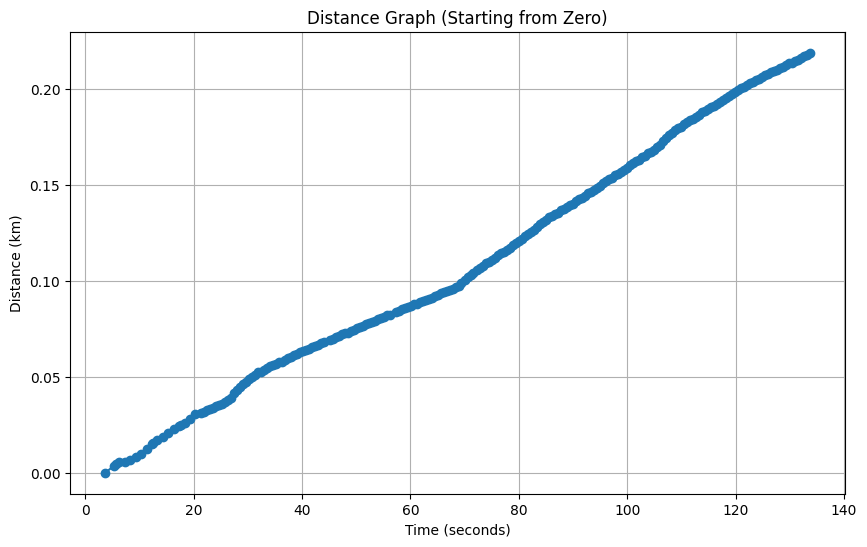

In [110]:
#In this cell, Distance graph (increasing from zero)cis shown using matplotlib.
#The distance graph is created by calculating the distance between consecutive points using the Haversine formula.
#The graph is saved as a PNG file (distance_graph.png), and can be viewed in the file explorer.

# Read the GPS data into a DataFrame
gps_df = pd.read_csv('GPS_data.csv')

# Assuming you have longitude and latitude data and want to calculate distances
# Calculate distances between consecutive points using Haversine formula
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees).
    """
    # Convert decimal degrees to radians
    lon1_rad, lat1_rad = lon1 * (3.14159/180), lat1 * (3.14159/180)
    lon2_rad, lat2_rad = lon2 * (3.14159/180), lat2 * (3.14159/180)

    # Haversine formula
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = (pow(np.sin(dlat/2), 2) + 
         np.cos(lat1_rad) * np.cos(lat2_rad) * 
         pow(np.sin(dlon/2), 2))
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r

# Calculate distances
distances = [0]  # Initialize the distances list with zero
for i in range(1, len(gps_df)):
    lon1, lat1 = gps_df.loc[i - 1, 'longitude'], gps_df.loc[i - 1, 'latitude']
    lon2, lat2 = gps_df.loc[i, 'longitude'], gps_df.loc[i, 'latitude']
    distance = haversine(lon1, lat1, lon2, lat2)
    distances.append(distances[-1] + distance)

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the distance graph starting from zero
plt.plot(gps_df['seconds_elapsed'], distances, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Distance (km)')
plt.title('Distance Graph (Starting from Zero)')

# Save the plot as a PNG file
plt.savefig('distance_graph.png')

# Show the plot
plt.grid(True)
plt.show()



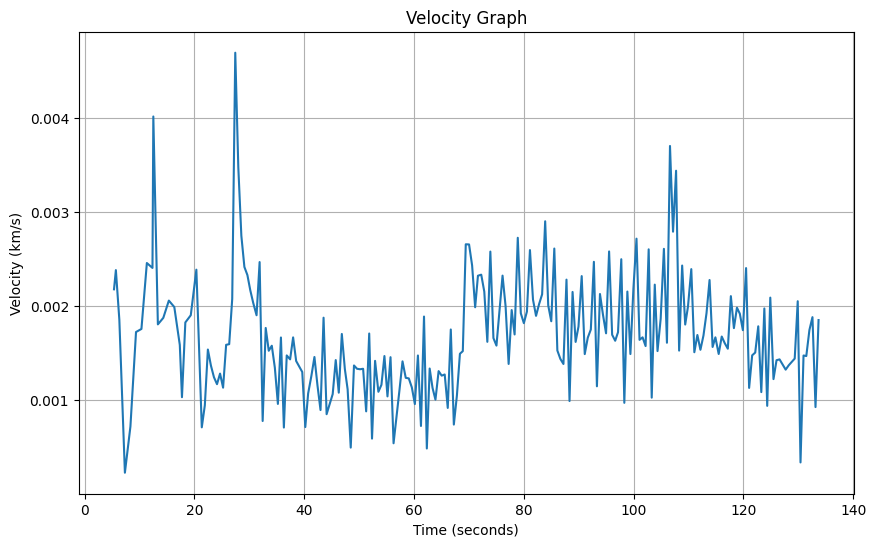

In [111]:
#In this cell, Velocity graph (calculated from coordinates) is shown using matplotlib.
#The velocity graph is created by calculating the velocity between consecutive points using the Haversine formula.
#The graph is saved as a PNG file (velocity_graph.png), and can be viewed in the file explorer.

# Function to calculate distance using Haversine formula
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees). 
    """
    # Convert decimal degrees to radians
    lon1 = radians(lon1)
    lat1 = radians(lat1)
    lon2 = radians(lon2)
    lat2 = radians(lat2)
    
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2*asin(sqrt(a))
    
    # Radius of earth in kilometers is 6371
    r = 6371
    distance = r * c
    return distance

# Function to calculate velocity
def calculate_velocity(distance, time_diff):
    """
    Calculate velocity given distance and time difference.
    """
    if time_diff == 0:
        return 0
    else:
        return distance / time_diff

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('GPS_data.csv')

# Initialize lists to store velocities and time differences
velocities = []
time_diffs = []

# Calculate velocities based on coordinates
for i in range(1, len(df)):
    lat1, lon1 = df.loc[i - 1, 'latitude'], df.loc[i - 1, 'longitude']
    lat2, lon2 = df.loc[i, 'latitude'], df.loc[i, 'longitude']
    distance = haversine(lon1, lat1, lon2, lat2)
    time_diff = df.loc[i, 'seconds_elapsed'] - df.loc[i - 1, 'seconds_elapsed']
    velocity = calculate_velocity(distance, time_diff)
    velocities.append(velocity)
    time_diffs.append(time_diff)

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the velocity graph
plt.plot(df['seconds_elapsed'][1:], velocities, linestyle='-')

# Add labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Velocity (km/s)')
plt.title('Velocity Graph')

# Save the plot as a PNG file
plt.savefig('velocity_graph.png')

# Show the plot
plt.grid(True)
plt.show()


In [112]:
#In this cell, we look at the content of the Acceleration_data.csv file, and read it into a pandas DataFrame.

#Read data
df = pd.read_csv('Acceleration_data.csv')
df.head()

,Unnamed: 0,seconds_elapsed,z,y,x
0,0,0.143440,-2.846008,-0.581977,-0.468246
1,1,0.159217,-2.651466,-0.560432,-0.418557
2,2,0.175117,-2.132024,-0.366186,-0.535990
3,3,0.190986,-1.023350,-0.041039,-0.522485
4,4,0.206763,-0.449766,0.229015,-0.356920


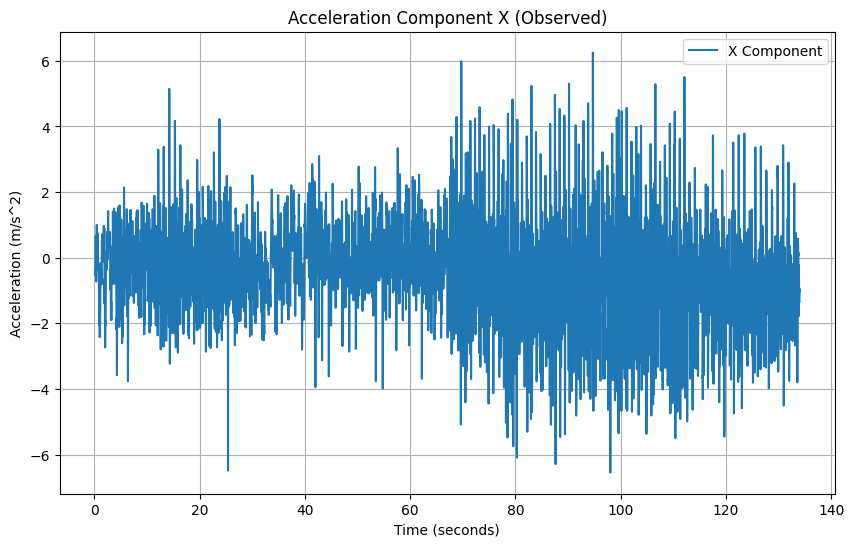

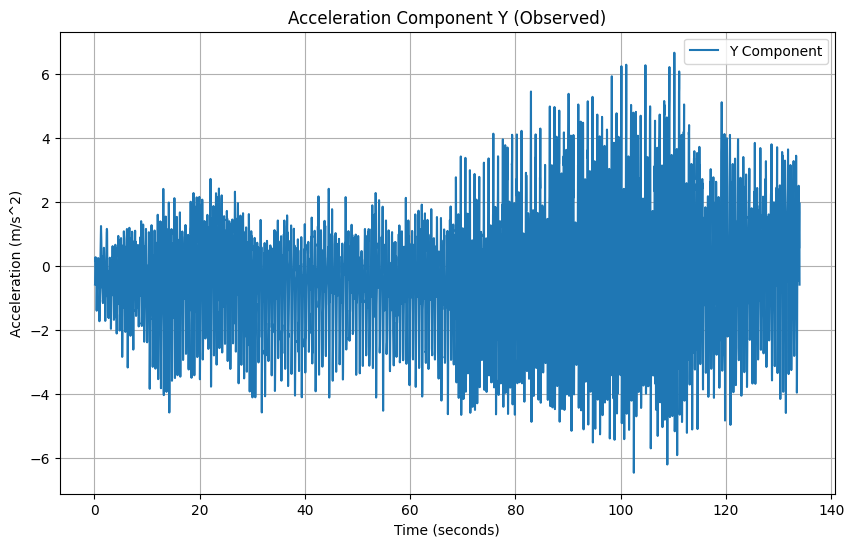

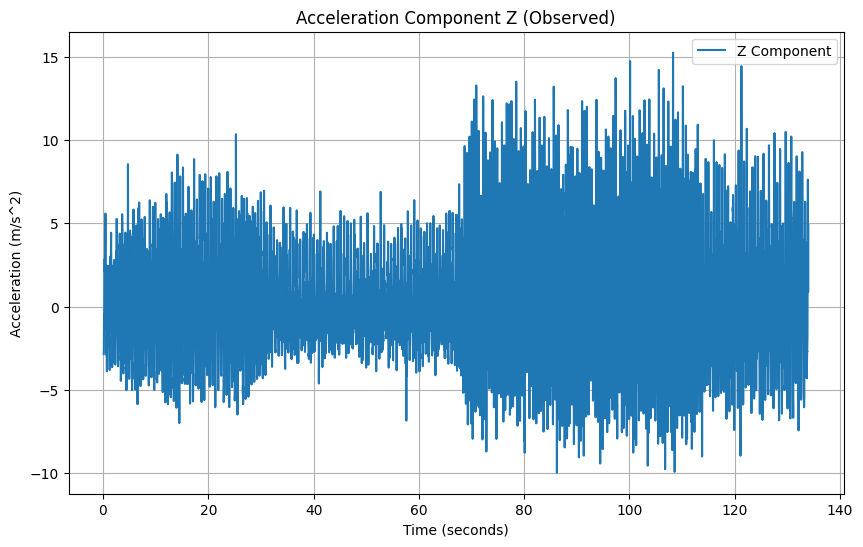

In [114]:
#In this cell, Acceleration graph (observed [three components])is made using matplotlib.
#The acceleration graph is created by plotting the x, y, and z components of acceleration against time.
#The graphs are saved as PNG files (acceleration_x.png, acceleration_y.png, and acceleration_z.png), and can be viewed in the file explorer.


# Plot the x component of acceleration
plt.figure(figsize=(10, 6))
plt.plot(df['seconds_elapsed'], df['x'], label='X Component', linestyle='-', )
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration Component X (Observed)')
plt.legend()
# Save the plot as a PNG file
plt.savefig('acceleration_x.png')
plt.grid(True)
plt.show()

# Plot the y component of acceleration
plt.figure(figsize=(10, 6))
plt.plot(df['seconds_elapsed'], df['y'], label='Y Component', linestyle='-')
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration Component Y (Observed)')
plt.legend()
# Save the plot as a PNG file
plt.savefig('acceleration_y.png')
plt.grid(True)
plt.show()

# Plot the z component of acceleration
plt.figure(figsize=(10, 6))
plt.plot(df['seconds_elapsed'], df['z'], label='Z Component', linestyle='-')
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration Component Z (Observed)')
plt.legend()
# Save the plot as a PNG file
plt.savefig('acceleration_z.png')
plt.grid(True)
plt.show()




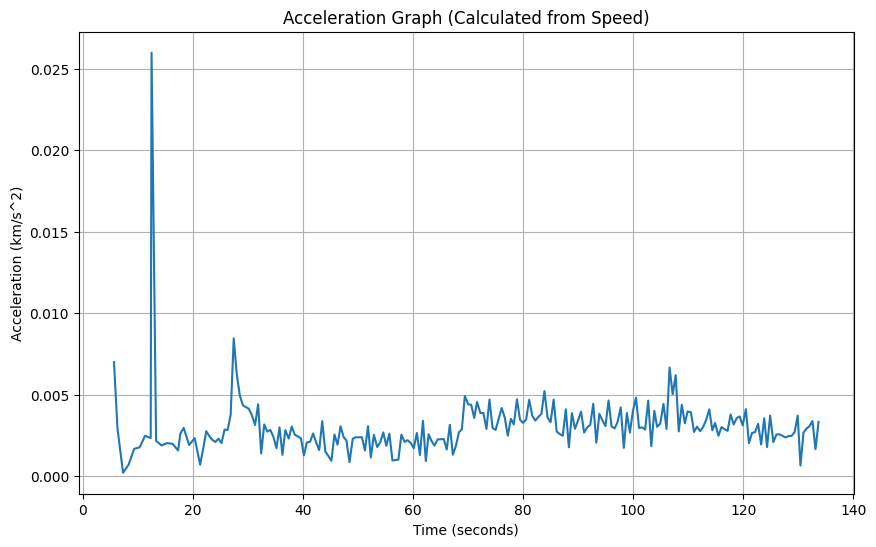

In [115]:
#In this cell, Acceleration graph (calculated from speed [one components]) is made using matplotlib.
#The acceleration graph is created by calculating the acceleration from the velocity graph (GPS_data.csv file).
#The graph is saved as a PNG file (acceleration_fromspeed.png), and can be viewed in the file explorer.

# Function to calculate velocity
def calculate_velocity(distance, time_diff):
    """
    Calculate velocity given distance and time difference.
    """
    if time_diff == 0:
        return 0
    else:
        return distance / time_diff
    
# Function to calculate acceleration
def calculate_acceleration(velocity, time_diff):
    """
    Calculate acceleration given velocity and time difference.
    """
    if time_diff == 0:
        return 0
    else:
        return (velocity - 0) / time_diff
    
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('GPS_data.csv')

# Initialize lists to store velocities and time differences
velocities = []
time_diffs = []

# Calculate velocities based on coordinates
for i in range(1, len(df)):
    lat1, lon1 = df.loc[i - 1, 'latitude'], df.loc[i - 1, 'longitude']
    lat2, lon2 = df.loc[i, 'latitude'], df.loc[i, 'longitude']
    distance = haversine(lon1, lat1, lon2, lat2)
    time_diff = df.loc[i, 'seconds_elapsed'] - df.loc[i - 1, 'seconds_elapsed']
    velocity = calculate_velocity(distance, time_diff)
    velocities.append(velocity)
    time_diffs.append(time_diff)

# Initialize lists to store accelerations and time differences
accelerations = []
time_diffs2 = []

# Calculate accelerations based on velocities
for i in range(1, len(velocities)):
    velocity1 = velocities[i - 1]
    velocity2 = velocities[i]
    time_diff2 = time_diffs[i]
    acceleration = calculate_acceleration(velocity2, time_diff2)
    accelerations.append(acceleration)
    time_diffs2.append(time_diff2)

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the acceleration graph
plt.plot(df['seconds_elapsed'][2:], accelerations, linestyle='-')

# Add labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration (km/s^2)')
plt.title('Acceleration Graph (Calculated from Speed)')
# Save the plot as a PNG file
plt.savefig('acceleration_fromspeed.png')
plt.grid(True)
plt.show()



In [132]:
#In this cell, the Average speed, the distance traveled, and Acceleration from speed is calculated and printed from the GPS data.
#The average speed is calculated by dividing the total distance traveled by the total time elapsed.
#The total distance is calculated by summing the distances between consecutive points.
#The acceleration is calculated by dividing the change in speed by the change in time.


import pandas as pd
import numpy as np

# Read the GPS data
gps_df = pd.read_csv('GPS_data.csv')

# Remove rows with missing or invalid longitude and latitude values
gps_df = gps_df.dropna(subset=['longitude', 'latitude'])

# Calculate distance between consecutive points using Haversine formula
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees).
    """
    # Convert decimal degrees to radians
    lon1_rad, lat1_rad = np.radians(lon1), np.radians(lat1)
    lon2_rad, lat2_rad = np.radians(lon2), np.radians(lat2)

    # Haversine formula
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = np.sin(dlat/2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r

gps_df['distance'] = haversine(gps_df['longitude'].shift(), gps_df['latitude'].shift(), gps_df['longitude'], gps_df['latitude'])

# Calculate time differences for GPS data
gps_df['time_diff'] = gps_df['seconds_elapsed'].diff().fillna(0)

# Calculate total distance and total time
total_distance = gps_df['distance'].sum()  # in kilometers
total_time = gps_df['time_diff'].sum() / 3600  # convert seconds to hours

# Calculate average speed
average_speed = total_distance / total_time  # in kilometers per hour (km/h)

# Calculate acceleration (change in speed / change in time)
gps_df['speed'] = gps_df['distance'] / gps_df['time_diff']  # Calculate speed
gps_df['acceleration'] = gps_df['speed'].diff() / gps_df['time_diff']  # Calculate acceleration

print("Traveled Distance:", total_distance, "kilometers")
print("Total Time Elapsed:", total_time, "hours or ", total_time * 3600, "seconds")
print("Average Speed:", average_speed, "kilometers per hour (km/h)")
print("Acceleration:", gps_df['acceleration'].mean(), "kilometers per hour squared (km/h^2)")



Traveled Distance: 0.21870509689541065 kilometers
Total Time Elapsed: 0.03610835578070746 hours or  129.99008081054686 seconds
Average Speed: 6.056910988239012 kilometers per hour (km/h)
Acceleration: 3.1671135602681206e-05 kilometers per hour squared (km/h^2)


In [133]:
#In the following cells, the total number of steps is calculated and printed
#The total number of steps is calculated by counting the number of times the acceleration changes sign from positive to negative.
#This is because each change in acceleration from positive to negative indicates a step. 
#First, we need to import the libraries we will use

import subprocess

# Specify the package you want to install
package_name = 'scipy'

# Run the pip install command
subprocess.check_call(['pip', 'install', package_name])


0

In [134]:
#In this cell, we define the filter functions for low-pass and high-pass filters using the Butterworth filter.
#The low-pass filter is used to remove high-frequency noise from the acceleration data.
#The high-pass filter is used to remove low-frequency noise from the acceleration data.

from scipy.signal import butter, filtfilt
def butter_lowpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    #Get the filter
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_highpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    #Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

The number of steps is 165


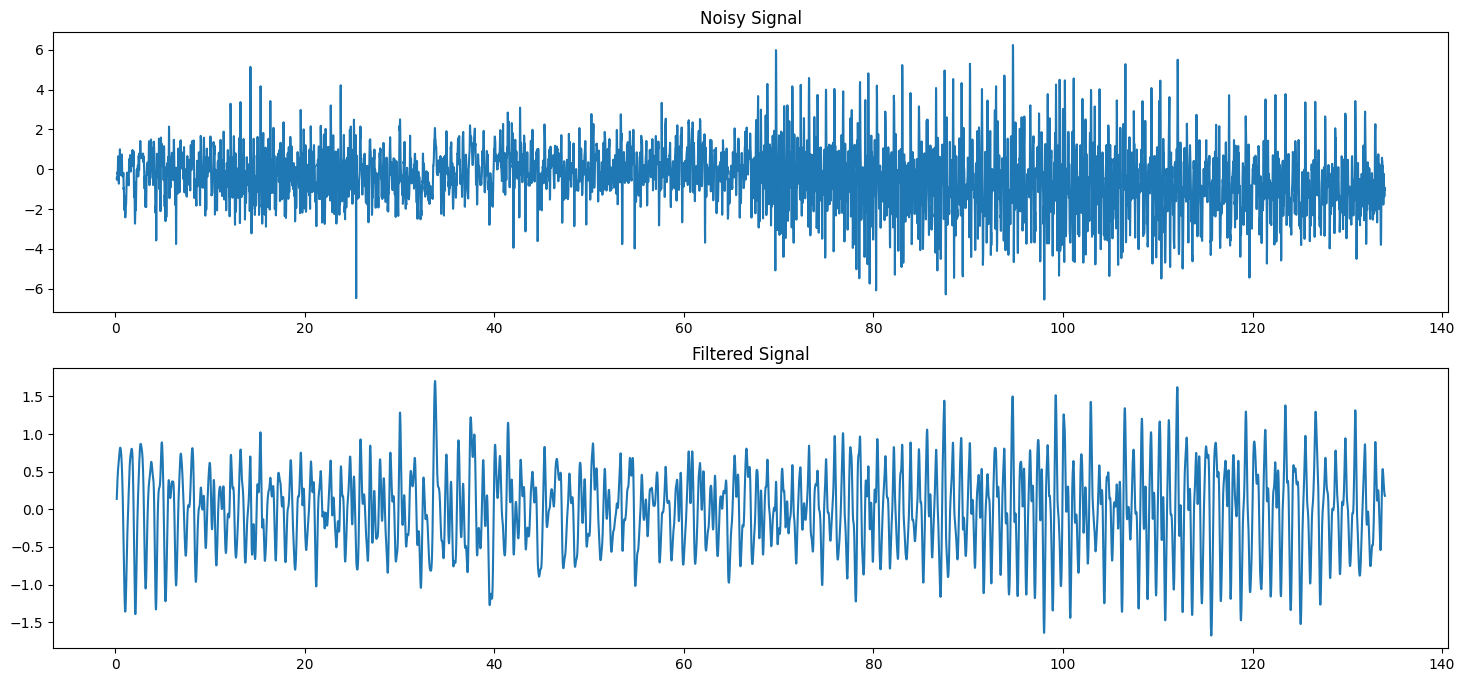

In [145]:
#In this cell, we filter the data using a low-pass filter to remove high-frequency noise, and then use a high-pass filter to remove low-frequency noise.
#The filtered acceleration data (Acceleration x) is then used to count the number of steps taken.
#The number of steps is calculated by counting the number of times the acceleration changes sign from positive to negative.
#The filtered acceleration data is also plotted to visualize the effect of the filtering.
#The graph is saved as a PNG file (filtered_acceleration.png), and can be viewed in the file explorer.

noisy_signal = df['x']
time = df['seconds_elapsed']
order = 2
dt = (time[len(time) - 1] - time[0]) / len(time)  # Time difference between consecutive observation, also called sampling interval

fs = 1/dt  # Sampling rate
nyq = 0.5 * fs  # Nyquist frequency
cutoff_H = 1/5  # Highpass cut-off
cutoff_L = 1/0.5  # Lowpass cut-off
# after this filtering, we'll have only frequencies from 1/40 to 1/5 in the data

lowpass_filtered = butter_lowpass_filter(noisy_signal, cutoff_L, fs, nyq, order)  # Filter out high frequencies
final_signal = butter_highpass_filter(lowpass_filtered, cutoff_H, fs, nyq, order)  # Filter out low frequencies

plt.figure(figsize=(18, 8))
plt.subplot(2, 1, 1)
plt.plot(time, noisy_signal)
plt.title('Noisy Signal')
plt.subplot(2, 1, 2)
plt.plot(time, final_signal)
plt.title('Filtered Signal')

stepdata = final_signal
steps = 0

for i in range(1, stepdata.shape[0]):
    if stepdata[i-1] >= 0 and stepdata[i] < 0:
        steps += 1
        
print('The number of steps is', steps)

# Save the plot as a PNG file
plt.savefig('filtered_acceleration.png')


In [139]:
#In this cell, the average acceleration is calculated and printed from the Acceleration_data.csv file.
#The average acceleration is calculated by taking the mean of the acceleration data.
#This is done to compare the acceleration data with the filtered acceleration data.

# Read the Acceleration data
acceleration_df = pd.read_csv('Acceleration_data.csv')

# Calculate the magnitude of acceleration
acceleration_df['magnitude'] = np.sqrt(acceleration_df['x']**2 + acceleration_df['y']**2 + acceleration_df['z']**2)

# Calculate time differences
acceleration_df['time_diff'] = acceleration_df['seconds_elapsed'].diff().fillna(0)

# Calculate acceleration (change in magnitude of acceleration / change in time)
acceleration_df['acceleration'] = acceleration_df['magnitude'].diff() / acceleration_df['time_diff']

# Calculate average acceleration
average_acceleration = acceleration_df['acceleration'].mean()

print("Acceleration (Observed):", average_acceleration / 1000, "km/h^2")



Acceleration (Observed): 1.7625656539372755e-05 km/h^2


Answer to questions

a. Does the acceleration calculated from the speed match the observed acceleration? What differences do you notice? What could be their cause?

    The acceleration calculated from the speed is 3.1671135602681206e-05 kilometers per hour squared (km/h^2), while the observed acceleration is 1.7625656539372755e-05 km/h^2. These values do not match perfectly - the calculated ACCELERATION FROM SPEED IS HIGHER THAN THE OBSERVED ACCELERATION. One reason of the difference is the variation between the accuracy of the GPS data and the accelometer data. Another reason is that the GPS and Accelometer sensors have limitaitons that affect the accuracy of data. Performance of the sensors can also be another reason for the difference. Lastly, the methods used to calculate the acceleration from speed and acceleration observed can also cause differences in results. 

b. Is the number of steps logical?

    Traveled Distance: 0.21870509689541065 kilometers
    Total Time Elapsed: 0.03610835578070746 hours or  129.99008081054686 seconds
    Average Speed: 6.056910988239012 kilometers per hour (km/h)
    Total number of steps : 165

    Average speed which is 6.0569 km/h is approximately 0.001682 km/s, which is within a reasonable range for walking speed.

    Average step length which is solved using the formula Average Step Length = Distance / Number of Steps is approximately 0.00133 km/step. According to various sources, the average step length for an adult walking at a comfortable pace on flat ground is typically between 0.0007 - 0.0009 km/step. Our calcualted step is 1.5 to 2 times higher than typical values therefore, it is not logical. However, there could be various factors in this discrepancy including discrepancies in walking speed or inaccuracies in step count or distance measurement. In addition, it is also good to consider some reasonable context like if the person has a longer stride length due to height, or the person is brisk walking, or doing some kind of exercise that requires fast smaller steps. 

    



